<a href="https://colab.research.google.com/github/ankurneo/EVA/blob/Assignment7/CIFAR_GradCam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your assignment is to build the above training structure. 

Train ResNet18 on Cifar10 for 20 Epochs. 

The assignment must:
pull your Github code to google colab (don't copy-paste code)
prove that you are following the above structure
that the code in your google collab notebook is NOTHING.. barely anything.

There should not be any function or class that you can define in your Google Colab Notebook. Everything must be imported from all of your other files
your colab file must:

train resnet18 for 20 epochs on the CIFAR10 dataset

show loss curves for test and train datasets

show a gallery of 10 misclassified images

show gradcam Links to an external site.output on 10 misclassified images. 

Remember if you are applying GradCAM on a channel that is less than 5px, then please don't bother to submit the assignment. 😡🤬🤬🤬🤬
Once done, upload the code to GitHub, and share the code. This readme must link to the main repo so we can read your file structure. 
Train for 20 epochs
Get 10 misclassified images
Get 10 GradCam outputs on any misclassified images (remember that you MUST use the library we discussed in the class)
Apply these transforms while training:
RandomCrop(32, padding=4)
CutOut(16x16)

# Import Libraries

In [1]:
!pip install torchsummary
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-c5azw_hm
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-c5azw_hm
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 2183a9cbc1bd5fc1d8e134b4f3318c3b6db5671f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise. 


# Dataset and Creating Train/Test Split

In [2]:
from utils import *
from main import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# load Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Load Test dataloader
testloader = cifar10.loader(train_flag=False)

# Get all the classes
classes = cifar10.classes


CUDA availability ? True
Files already downloaded and verified
Files already downloaded and verified


Import Model

# Training 
Let's write train function

In [3]:
from models.resnet import *
import torch

# Loading ResNet18 Model
model = ResNet18()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
model = model.to(device)

cuda


In [4]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(model, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
    

In [5]:
# Load train and test model
EPOCHS = 20
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()
l1reg = False
train_loss, test_loss, train_acc, test_acc , test_pred, target_pred, target_data = main(EPOCHS, model, device, trainloader, testloader, optimizer, l1reg)


Epoch 0 : 
Train set: Average loss: 1.4032, Accuracy: 40.62

Test set: Average loss: 1.583, Accuracy: 45.99

Epoch 1 : 
Train set: Average loss: 1.2927, Accuracy: 54.64

Test set: Average loss: 0.974, Accuracy: 65.60

Epoch 2 : 
Train set: Average loss: 1.0514, Accuracy: 60.35

Test set: Average loss: 1.903, Accuracy: 48.82

Epoch 3 : 
Train set: Average loss: 0.9061, Accuracy: 64.63

Test set: Average loss: 1.013, Accuracy: 66.33

Epoch 4 : 
Train set: Average loss: 0.9117, Accuracy: 67.85

Test set: Average loss: 0.727, Accuracy: 74.29

Epoch 5 : 
Train set: Average loss: 0.9848, Accuracy: 70.34

Test set: Average loss: 0.744, Accuracy: 74.98

Epoch 6 : 
Train set: Average loss: 0.7817, Accuracy: 72.44

Test set: Average loss: 0.733, Accuracy: 75.20

Epoch 7 : 
Train set: Average loss: 0.6424, Accuracy: 74.37

Test set: Average loss: 0.960, Accuracy: 69.99

Epoch 8 : 
Train set: Average loss: 0.7814, Accuracy: 75.35

Test set: Average loss: 0.589, Accuracy: 79.72

Epoch 9 : 
Train s

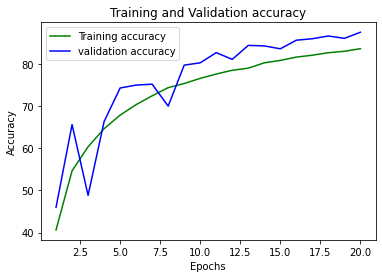

In [6]:
plot_train_vs_test_accuracy(EPOCHS, train_acc, test_acc)

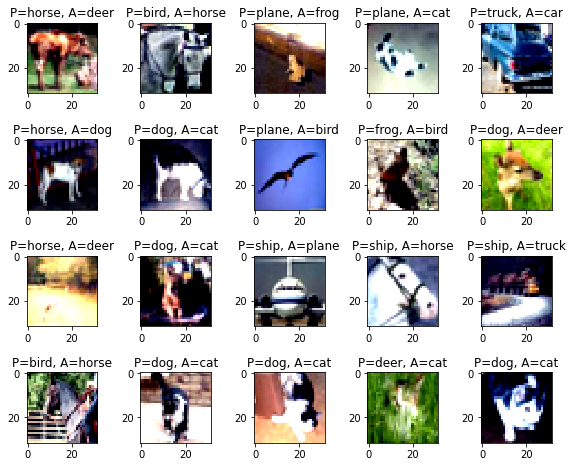

In [7]:
misclassified_images = view_misclassified_images(model, device, testloader, classes)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-2w7vvezq
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-2w7vvezq
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 2183a9cbc1bd5fc1d8e134b4f3318c3b6db5671f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Prediction is horse
Label is deer


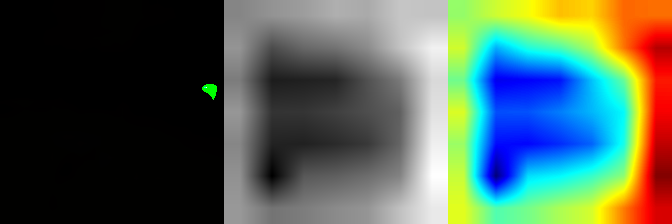

In [14]:
#https://jacobgil.github.io/pytorch-gradcam-book/CAM%20Metrics%20And%20Tuning%20Tutorial.html
#https://www.kaggle.com/code/antwerp/where-is-the-model-looking-for-gradcam-pytorch/notebook
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git

import warnings
warnings.filterwarnings('ignore')
from torchvision import models
import numpy as np
import cv2
import requests
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, \
    deprocess_image, \
    preprocess_image
from PIL import Image

#model = models.resnet18(pretrained=True)
#model.eval()
#image_url = "https://th.bing.com/th/id/R.94b33a074b9ceeb27b1c7fba0f66db74?rik=wN27mvigyFlXGg&riu=http%3a%2f%2fimages5.fanpop.com%2fimage%2fphotos%2f31400000%2fBear-Wallpaper-bears-31446777-1600-1200.jpg&ehk=oD0JPpRVTZZ6yizZtGQtnsBGK2pAap2xv3sU3A4bIMc%3d&risl=&pid=ImgRaw&r=0"
#img = np.array(Image.open(requests.get(image_url, stream=True).raw))
k=10
model = models.resnet18(pretrained=True)
prediction = misclassified_images[k][1].data.cpu().numpy()
label = misclassified_images[k][2].data.cpu().numpy()
print("Prediction is", classes[prediction])
print("Label is", classes[label])
img = misclassified_images[k][0].data.permute(1, 2, 0).cpu().numpy()
img = cv2.resize(img, (224, 224))
img = np.float32(img) / 255
input_tensor = preprocess_image(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# The target for the CAM is the Bear category.
# As usual for classication, the target is the logit output
# before softmax, for that category.
targets = [ClassifierOutputTarget(label)]
target_layers = [model.layer4]
with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
    cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)
cam = np.uint8(255*grayscale_cams[0, :])
cam = cv2.merge([cam, cam, cam])
images = np.hstack((np.uint8(255*img), cam , cam_image))
Image.fromarray(images)